In [156]:
import astropy
import scipy.integrate as spi
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
import astropy
from astropy import units as u
from astropy import constants as c
from scipy.integrate import quad

sns.set_style("whitegrid")

In [174]:
# Constants

pi = np.pi
h = 6.626e-34 # J s
c = 3.0e+8 # m s^-1
k = 1.38e-23
sbc = 5.67*10e-8 # W m^-2 K^-4
sbcc = 5.67*10e-5 # erg/s/cm^2/K^4


In [186]:
#Problem 2.1 - Total thermal power radiated by your skin (Power = Flux x Area)

def therm_pow(temp,weight,height): #weight in kg, height in 
    'Using Du Bois formula to calculate surface area of skin'
    'https://en.wikipedia.org/wiki/Body_surface_area'
    flux = sbcc*((temp+273)**4) 
    BSA = 0.007184 * (weight**0.425) * (height**0.725) * (10**4) #convert to cm^2
    tpow = flux * BSA
    return print('Thermal power radiated by your skin:',tpow,'erg/s')

therm_pow(33,125,162)

Thermal power radiated by your skin: 11115275450.978018 erg/s


In [309]:
#Problem 2.2 - Peak wavelength of your blackbody emission

def wiens_law(temp): #with temp in Celsius
    "Calculates peak wavelength using Wien's law"
    wl = 0.0028 / (temp+273)
    return print("Peak wavelength of your blackbody emission:",wl, "m")

alyssa_peak = wiens_law(33)

Peak wavelength of your blackbody emission: 9.150326797385621e-06 m


In [225]:
#Problem 2.3 - Total number of thermal photons contained in your body

def stebo_law(temp,weight,height): # K , kg , cm 
    'caluclates power radiated by blackbody / stefan-boltzmann law'
    BSA = 0.007184 * (weight**0.425) * (height**0.725) * (10**4) #convert to cm^2
    pow = BSA*(temp**4)
    energy = pow * 36000 #10 hours
    wl = 0.0028 / (temp+273)
    freq = c/wl
    ephoton = h * freq 
    # total thermal energy radiated by person over 10 hours
    nphotons = (energy/ephoton)
    return print(nphotons,"total thermal photons")

stebo_law(33,125,162)

4.394137510101645e+34 total thermal photons


In [233]:
#Problem 2.4 - Net radiative pressure exerted on your skin 

def P_rad(temp,weight,height):
    ''
    BSA = 0.007184 * (weight**0.425) * (height**0.725) * (10**4) #convert to cm^2
    pow = BSA*(temp**4) #cm^2 K^4 --> erg/s
    int = pow / BSA 
    Prad = (2*int)/c #x2 for to account for pressure due absorbed and emitted radition 
    return print(Prad, "erg/cm^3 of pressure exerted on your skin")

P_rad(33,125,162)

0.00790614 erg/cm^3 of pressure exerted on your skin


In [308]:
#Problem 2.5 - Sun's thermal flux at the orbital distance of Jupiter
#HINT: Remember the 1/r^2 factor

jup_rad = 7.1492e7 #m

def flux_surf(rad):
    ''
    sun_rad = 6.95e8 #m
    sun_jup_dist = 142800e3 #distance between sun and jupiter = orbital distsance
    fs = 4*pi*(sun_rad**2)*((sun_rad)/(rad))**2
    them_flux = fs/sun_jup_dist
    return print("Flux from Sun on Jupiter is ",them_flux, "erg/s/cm^2")

flux_surf(jup_rad)

Flux from Sun on Jupiter is  4017038383925.082 erg/s/cm^2


In [260]:
#Problem 2.6 - Thermal flux emitted by Jupiter

sbcc = 5.67*10e-5 # erg/s/cm^2/K^4

#Temperature of Jupiter: -110 Celsius or 160 K
trap = 160
# https://science.nasa.gov/resource/solar-system-temperatures/

#Radius of Jupiter: 71,492 km or 7.1492e9 centimeters
jrap = 7.1492e9
#https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html

def flux_sun(rad,temp):
    'calculates thermal flux emitted'
    pe = 4*pi*(rad**2)*sbcc*(temp**4)
    flux = sbcc * temp**4
    lum = 4*pi*(rad**2)*flux
    return print("Thermal flux emitted by Sun is", flux, "erg/s/cm^2")


def flux_jup(rad,temp):
    'calculates thermal flux emitted'
    pe = 4*pi*(rad**2)*sbcc*(temp**4)
    flux = sbcc * temp**4
    lum = 4*pi*(rad**2)*flux
    return print("Thermal flux emitted by Jupiter is", flux, "erg/s/cm^2")

flux_jup(jrap,trap)
flux_sun(6.95e10,5773)

Thermal flux emitted by Jupiter is 371589.12 erg/s/cm^2
Thermal flux emitted by Sun is 629780615302.3918 erg/s/cm^2


These two quantities compare in that the flux emitted by Jupiter is much smaller than the Sun's.


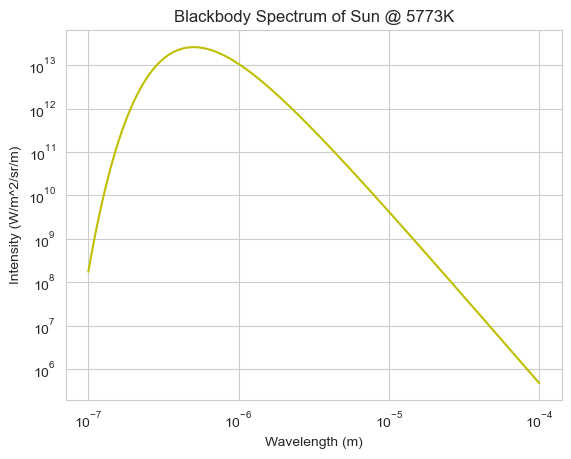

In [288]:
#Problem 3a - Plot and describe binaries (observed at a distance of 10 pc)

wave_rang = np.arange(1e-7,1e-4,1e-9) # .1 micron (1e-7m) to 100 micron (1e-4) in 1 nm increments 


def planck_blam (wav, temp):
    'calculates intensity (spectral radiance) from wav and temp'
    eq1 = (2*h*c**2)/(wav**5)
    eq2 = 1/(np.exp((h*c)/(wav*k*temp))-1)
    bbs = (eq1 * eq2)
    return bbs 

def flux_den (wav, temp):
    'calculates intensity from wav and temp'
    'calculates total flux by integrating intensity then...'
    'calcualtes flux density from total flux'
    eq1 = (2*h*c**2)/(wav**5)
    eq2 = 1/(np.exp((h*c)/(wav*k*temp))-1)
    bbs = (eq1 * eq2)
    #tf = spi.trapz(bbs, wave_rang)
    fd = sbc * temp**4
    return fd

#Testing plotting blackbody spectrum of Sun @ 5773K
sun_bbs = planck_blam(wave_rang,5773)
sun_bbs2 = planck_blam(wave_rang,5773)

plt.xscale('log')
plt.yscale('log')
plt.plot(wave_rang,sun_bbs, 'y-')
plt.title('Blackbody Spectrum of Sun @ 5773K')
plt.xlabel('Wavelength (m)')
plt.ylabel('Intensity (W/m^2/sr/m)')
plt.show() 

/var/folders/nd/_4jcb2vn493dd2kv2yhc839m0000gn/T/ipykernel_27869/4250602469.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "y-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(wave_rang,sun_sp, 'y-',label='Sun',linestyle='dashed')
/var/folders/nd/_4jcb2vn493dd2kv2yhc839m0000gn/T/ipykernel_27869/4250602469.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(wave_rang,M5dw_sp, 'r-',label='M5 dwarf',linestyle='dashed')
/var/folders/nd/_4jcb2vn493dd2kv2yhc839m0000gn/T/ipykernel_27869/4250602469.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(wave_rang,Arct_sp, 'g-',label='Arct.',linestyle='dashed')


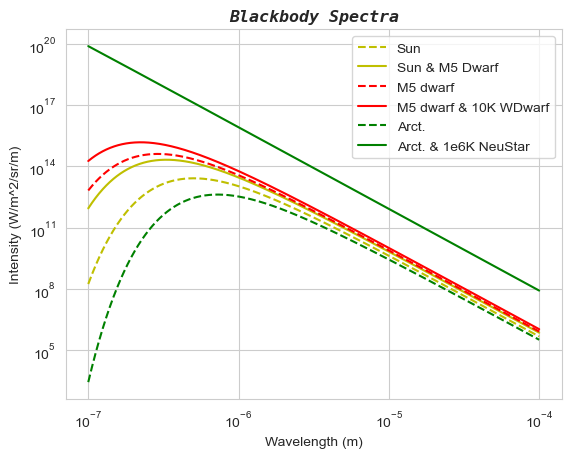

In [310]:
#Problem 3b

#Sun like star @ 5773 K w/wo M5 dwarf companion @ 3000K
#https://en.wikipedia.org/wiki/Stellar_classification
sun_sp = planck_blam(wave_rang,5773)
sun_M5dw_sp = planck_blam(wave_rang,(5773+3000))

#M5 dwarf star w/wo 10,000K white dwarf companion
M5dw_sp = planck_blam(wave_rang,1e4) 
M5dw_10Kdw_sp = planck_blam(wave_rang,1e4+3000) 
                            
#Arcturus w/wo a 1,000,000 K neutron star companion
Arct_sp = planck_blam(wave_rang,4000)
Arct_1MKns_sp = planck_blam(wave_rang,4000+1000000)
                            
                            
plt.xscale('log')
plt.yscale('log')
plt.plot(wave_rang,sun_sp, 'y-',label='Sun',linestyle='dashed')
plt.plot(wave_rang,sun_M5dw_sp, 'y-',label='Sun & M5 Dwarf')
plt.plot(wave_rang,M5dw_sp, 'r-',label='M5 dwarf',linestyle='dashed')
plt.plot(wave_rang,M5dw_10Kdw_sp, 'r-',label='M5 dwarf & 10K WDwarf')
plt.plot(wave_rang,Arct_sp, 'g-',label='Arct.',linestyle='dashed')
plt.plot(wave_rang,Arct_1MKns_sp, 'g-',label='Arct. & 1e6K NeuStar')
plt.legend(loc="upper right")
plt.title('Blackbody Spectra',fontsize='large',loc='center',fontweight='bold',style='italic',family='monospace')
plt.xlabel('Wavelength (m)')
plt.ylabel('Intensity (W/m^2/sr/m)')
plt.show()                           

In [ ]:
#Problem 3c 

sbc = 5.67*10**-5
Rstar = 6.95*10**8 #m
AU = 1.496*10**11 #m
RC = Rstar + 100*AU
tfreq = 1e-6 # 1 micron??

def fstar_freq():
    fsf = 
    return fsf


#integrate
Fabs = Fstar_freq*((Rstar/RC)**2)*(1-np.exp(-tfreq))

temp_cloud1 = (Fabs/2*sbc)**(1/4)



In [150]:
#Problem 3d

sbc = 5.67*10**-5 #erg/cm^2/s/K^4

def temp_cloud (freq):
    Fa = Fstar_freq*((Rstar/RC)**2)*(1-np.exp(-tfreq))*dfreq
    tc = (Fabs/2*sbc)**(1/4)
    tf = v/(3*10**14) #1 micron
    return tf

def integrand(wav):
    bbs = planck_blam(wav,5773)
    return bbs

#result,error = quad(integrand, 0,np.inf)

#print(result)

result = quad(integrand,0,np.inf)



/var/folders/nd/_4jcb2vn493dd2kv2yhc839m0000gn/T/ipykernel_27869/2397153723.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result = quad(integrand,0,np.inf)
